In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spacy
import seaborn as sns
from nltk.corpus import stopwords, gutenberg
from collections import Counter
import re
import scipy
import nltk
import warnings
warnings.filterwarnings("ignore")

In [2]:
per_15 = ['truth_chaucer', 'to_rosemounde_chaucer', 'troilus_criseyde_chaucer', 
          'phillip_sparrow_skelton', 'mannerly_skelton', 'mistress_hussey_skelton',
          'tunning_rumming_skelton', 'womanhood_skelton', 'blow_northerne_anon', 
          'younger_sister_anon', 'st_stephen_anon']
per_16_17 = ['phoenix_turtle_shakespeare','sonnet_18_shakespeare', 'sonnet_25_shakespeare', 
             'sonnet_87_shakespeare','sonnet_71_shakespeare', 'at_a_solemn_milton', 'on_shakespeare_milton',
             'sonnet_7_milton', 'lallegro_milton', 'elegy_to_memory_pope', 'you_know_where_pope',
             'universal_prayer_pope', 'ode_solitude_pope']
per_18 = ['america_whitman', 'i_hear_america_whitman', 'o_captian_whitman', 'ebbd_whitman', 
          'out_of_cradle_whitman', '340_dickinson', 
          '355_dickinson', '479_dickinson', '1325_dickinson', 'song_experience_blake',
          'song_innocence_blake', 'smile_blake', 'love_and_death_byron', 'walks_beauty_byron',
          'darkness_byron', 'dear_doctor_byron']
per_19_1 =['of_mere_stevens', 'snowman_stevens', 'key_west_stevens', 'modern_poetry_stevens', 
           'portrait_lady_eliot', 'sweeney_eliot', 'if_kipling', 'children_kipling', 
           'city_sleep_kipilng', 'for_all_kipling', 'between_walls_wcw', 'red_wheelbarrow_wcw', 
           'love_song_wcw', 'ball_game_wcw', 'all_in_green_cummings', 'in_just_cummings', 
           'kitty_cummings', 'o_sweet_cummings', 'into_sternuous_cummings']
per_19_2 = [ 'howl_ginsberg', 'homework_ginsberg', 'sad_self_ginsberg', 
             'sunflower_ginsberg', 'america_ginsberg', 'fever_plath', 
             'ariel_plath', 'edge_plath', 'morning_song_plath', 'colossus_plath', 
             'caged_angelou', 'still_i_angelou', 'mothering_blackness_angelou', 
             'phenom_woman_angelou','personal_ohara', 'ave_maria_ohara', 'the_day_ohara']

files = ['truth_chaucer', 'to_rosemounde_chaucer', 'troilus_criseyde_chaucer', 
         'phillip_sparrow_skelton', 'mannerly_skelton', 'mistress_hussey_skelton',
         'tunning_rumming_skelton', 'womanhood_skelton', 'blow_northerne_anon', 
         'younger_sister_anon', 'st_stephen_anon', 'phoenix_turtle_shakespeare','sonnet_18_shakespeare', 'sonnet_25_shakespeare', 
         'sonnet_87_shakespeare','sonnet_71_shakespeare', 'at_a_solemn_milton', 'on_shakespeare_milton',
         'sonnet_7_milton', 'lallegro_milton', 'elegy_to_memory_pope', 'you_know_where_pope',
         'universal_prayer_pope', 'ode_solitude_pope','america_whitman', 'i_hear_america_whitman', 'o_captian_whitman', 'ebbd_whitman', 
         'out_of_cradle_whitman', '340_dickinson', 
         '355_dickinson', '479_dickinson', '1325_dickinson', 'song_experience_blake',
         'song_innocence_blake', 'smile_blake', 'love_and_death_byron', 'walks_beauty_byron',
         'darkness_byron', 'dear_doctor_byron', 'of_mere_stevens', 'snowman_stevens', 
         'key_west_stevens', 'modern_poetry_stevens', 
         'portrait_lady_eliot', 'sweeney_eliot', 'if_kipling', 'children_kipling', 
         'city_sleep_kipilng', 'for_all_kipling', 'between_walls_wcw', 'red_wheelbarrow_wcw', 
          'love_song_wcw', 'ball_game_wcw', 'all_in_green_cummings', 'in_just_cummings', 
         'kitty_cummings', 'o_sweet_cummings', 'into_sternuous_cummings',  'howl_ginsberg', 'homework_ginsberg', 'sad_self_ginsberg', 'sunflower_ginsberg', 'america_ginsberg',
         'fever_plath', 'ariel_plath', 'edge_plath', 'morning_song_plath', 'colossus_plath', 
         'caged_angelou', 'still_i_angelou', 'mothering_blackness_angelou', 'phenom_woman_angelou',
         'personal_ohara', 'ave_maria_ohara', 'the_day_ohara']
         

In [3]:
filedata = {file: open('C:\\Users\\justf\\Desktop\\txtfiles\\' + file + '.txt', 'r') for file 
            in files}

In [4]:
author = []
title = []
period = []
columns = []
text = []

In [5]:
def text_and_split(files):
    
    for file in files:
        poem = filedata[file].read()
        split = file.split('_')
        name = split[-1]
        work = split[:-1]
        text.append(poem)
        author.append(name)
        title.append(work)

In [6]:
text_and_split(per_15)
text_and_split(per_16_17)
text_and_split(per_18)
text_and_split(per_19_1)
text_and_split(per_19_2)

In [7]:
col_per = ['period 15','period 15','period 15','period 15','period 15',
           'period 15','period 15','period 15','period 15','period 15','period 15','period 16/17',
           'period 16/17','period 16/17','period 16/17','period 16/17','period 16/17',
           'period 16/17','period 16/17','period 16/17','period 16/17','period 16/17',
           'period 16/17','period 16/17','period 18','period 18','period 18','period 18',
           'period 18','period 18','period 18','period 18','period 18','period 18',
           'period 18','period 18','period 18','period 18','period 18','period 18','period 19_1', 
           'period 19_1','period 19_1','period 19_1','period 19_1','period 19_1','period 19_1',
           'period 19_1','period 19_1','period 19_1','period 19_1','period 19_1','period 19_1',
           'period 19_1','period 19_1','period 19_1','period 19_1','period 19_1','period 19_1',
           'period 19_2', 'period 19_2','period 19_2','period 19_2','period 19_2','period 19_2',
           'period 19_2','period 19_2','period 19_2','period 19_2','period 19_2','period 19_2',
           'period 19_2','period 19_2','period 19_2','period 19_2','period 19_2']

In [8]:
def cleaner(text):
    text = re.sub('[ï»¿]', '', text)
    text = re.sub('[â€™]', '', text)
    text = re.sub('[ã©]', '', text)
    text = text.lower()
    return text

In [9]:
clean_text = []
for i in range(len(text)):
    clean = cleaner(text[i])
    clean_text.append(clean)

In [10]:
title_join = []
for i in range(len(title)):
    work = ''.join(title[i])
    title_join.append(work)

In [11]:
line_splits = []
for i in range(76):
    lines = clean_text[i].split('\n\n')
    line_splits.append(lines)

line_split_clean = []
for i in range(len(line_splits)):
    for j in range(len(line_splits[i])):
        lines = ' '.join(line_splits[i][j].split())
        line_split_clean.append(lines)

In [12]:
df = pd.DataFrame({'poem':clean_text, 'author': author, 'period': col_per, 'title': title_join})

In [13]:
df_2 = pd.DataFrame(line_splits)
df_2['title'] = title_join

In [14]:
df_3 = pd.merge(df, df_2, on='title')
df_3 = df_3.set_index('title')

In [22]:
set_index = df_3.drop(['poem', 'period', 'author'], axis=1)

In [23]:
set_index = set_index.stack()

In [24]:
set_index = set_index.to_frame()
# set_index.reset_index(inplace=True)

In [25]:
print(set_index)

                                                                      0
title                                                                  
truth              0  fle fro the pres, and dwelle with sothefastnes...
                   1  tempest the nought al croked to redresse,\nin ...
                   2        that the is sent, receyve in buxumnesse;...
                   3        therfore, thou vache, leve thine olde wr...
torosemounde       0  madame, ye ben of al beaute shryne\nas fer as ...
                   1  for thogh i wepe of teres ful a tyne,\nyet may...
                   2  nas neuer pyk walwed in galauntyne\nas i in lo...
troiluscriseyde    0  and so bifel, whan comen was the tyme \nof ape...
                   1  and to the temple, in al hir beste wyse, \nin ...
                   2  among thise othere folk was criseyda, \nin wid...
                   3  as was criseyde, as folk seyde everichone \nth...
                   4  this troilus, as he was wont to gide \nhis

In [26]:
df_ant = df_3[['author', 'period']]
stanza_df = pd.merge(df_ant, set_index, how='right', on='title')

In [51]:
# stanza_df.drop([134,135,136,138,139,140,142,143,144,146,147,148,150,151,152, 
#                 154,155,156,158,159,160,162,163,164], inplace=True)
stanza_df.reset_index(inplace=True)

In [53]:
# stanza_df.columns = ['author', 'period', 'stanza']
stanza_df.reset_index(inplace=True)
cleaned = []
for i in range(len(stanza_df)):
    clean = ' '.join(stanza_df.iloc[i,3].split())
    cleaned.append(clean)
stanza_df.iloc[:,3] = cleaned

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5, 
                             min_df=2, 
                             stop_words='english', 
                             lowercase=False,
                             use_idf=True,
                             norm=u'l2', 
                             smooth_idf=False)

In [55]:
tfidf = vectorizer.fit_transform(stanza_df.iloc[:,3].values)

In [62]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation(damping=0.8, preference=-5).fit(tfidf)

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Estimated number of clusters: 17


In [63]:
from collections import Counter

In [64]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf)

In [65]:
tfidf_array = tfidf.toarray()
tfidf_df = pd.DataFrame(tfidf_array)
tfidf_df['author'] = stanza_df['author']

In [66]:
from sklearn.manifold import MDS

mds = MDS(n_components=2,  dissimilarity="precomputed", random_state=24)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

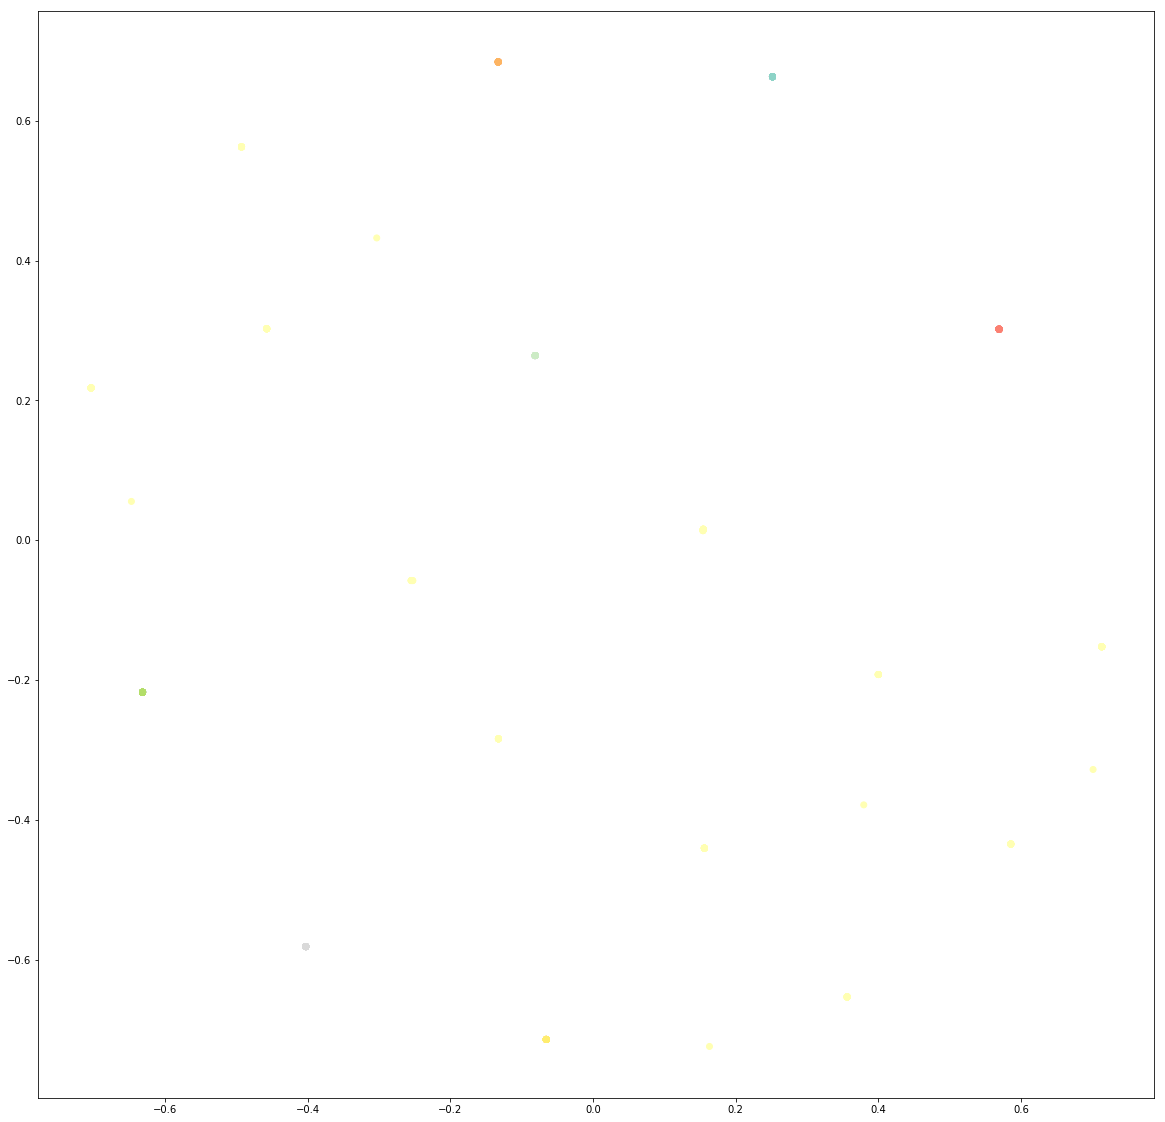

In [71]:
from sklearn.cluster import SpectralClustering

n_clusters=8

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters, random_state=24, n_neighbors=8, 
                        gamma=0.01)
sc.fit(tfidf)

#Predicted clusters.
predict=sc.fit_predict(tfidf)

# #Graph results.
plt.figure(figsize=(20,20))
plt.scatter(xs, ys, c=predict, cmap='Set3')
plt.show()

In [72]:
labels = sc.labels_
Counter(labels)

Counter({1: 191, 3: 35, 0: 27, 5: 27, 2: 61, 7: 28, 4: 46, 6: 23})

In [73]:
from sklearn.cluster import KMeans

num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=24)

%time km.fit(tfidf)

clusters = km.labels_.tolist()
centers = km.cluster_centers_

Wall time: 110 ms


In [74]:
Counter(clusters)

Counter({0: 268, 2: 35, 3: 61, 4: 28, 1: 46})

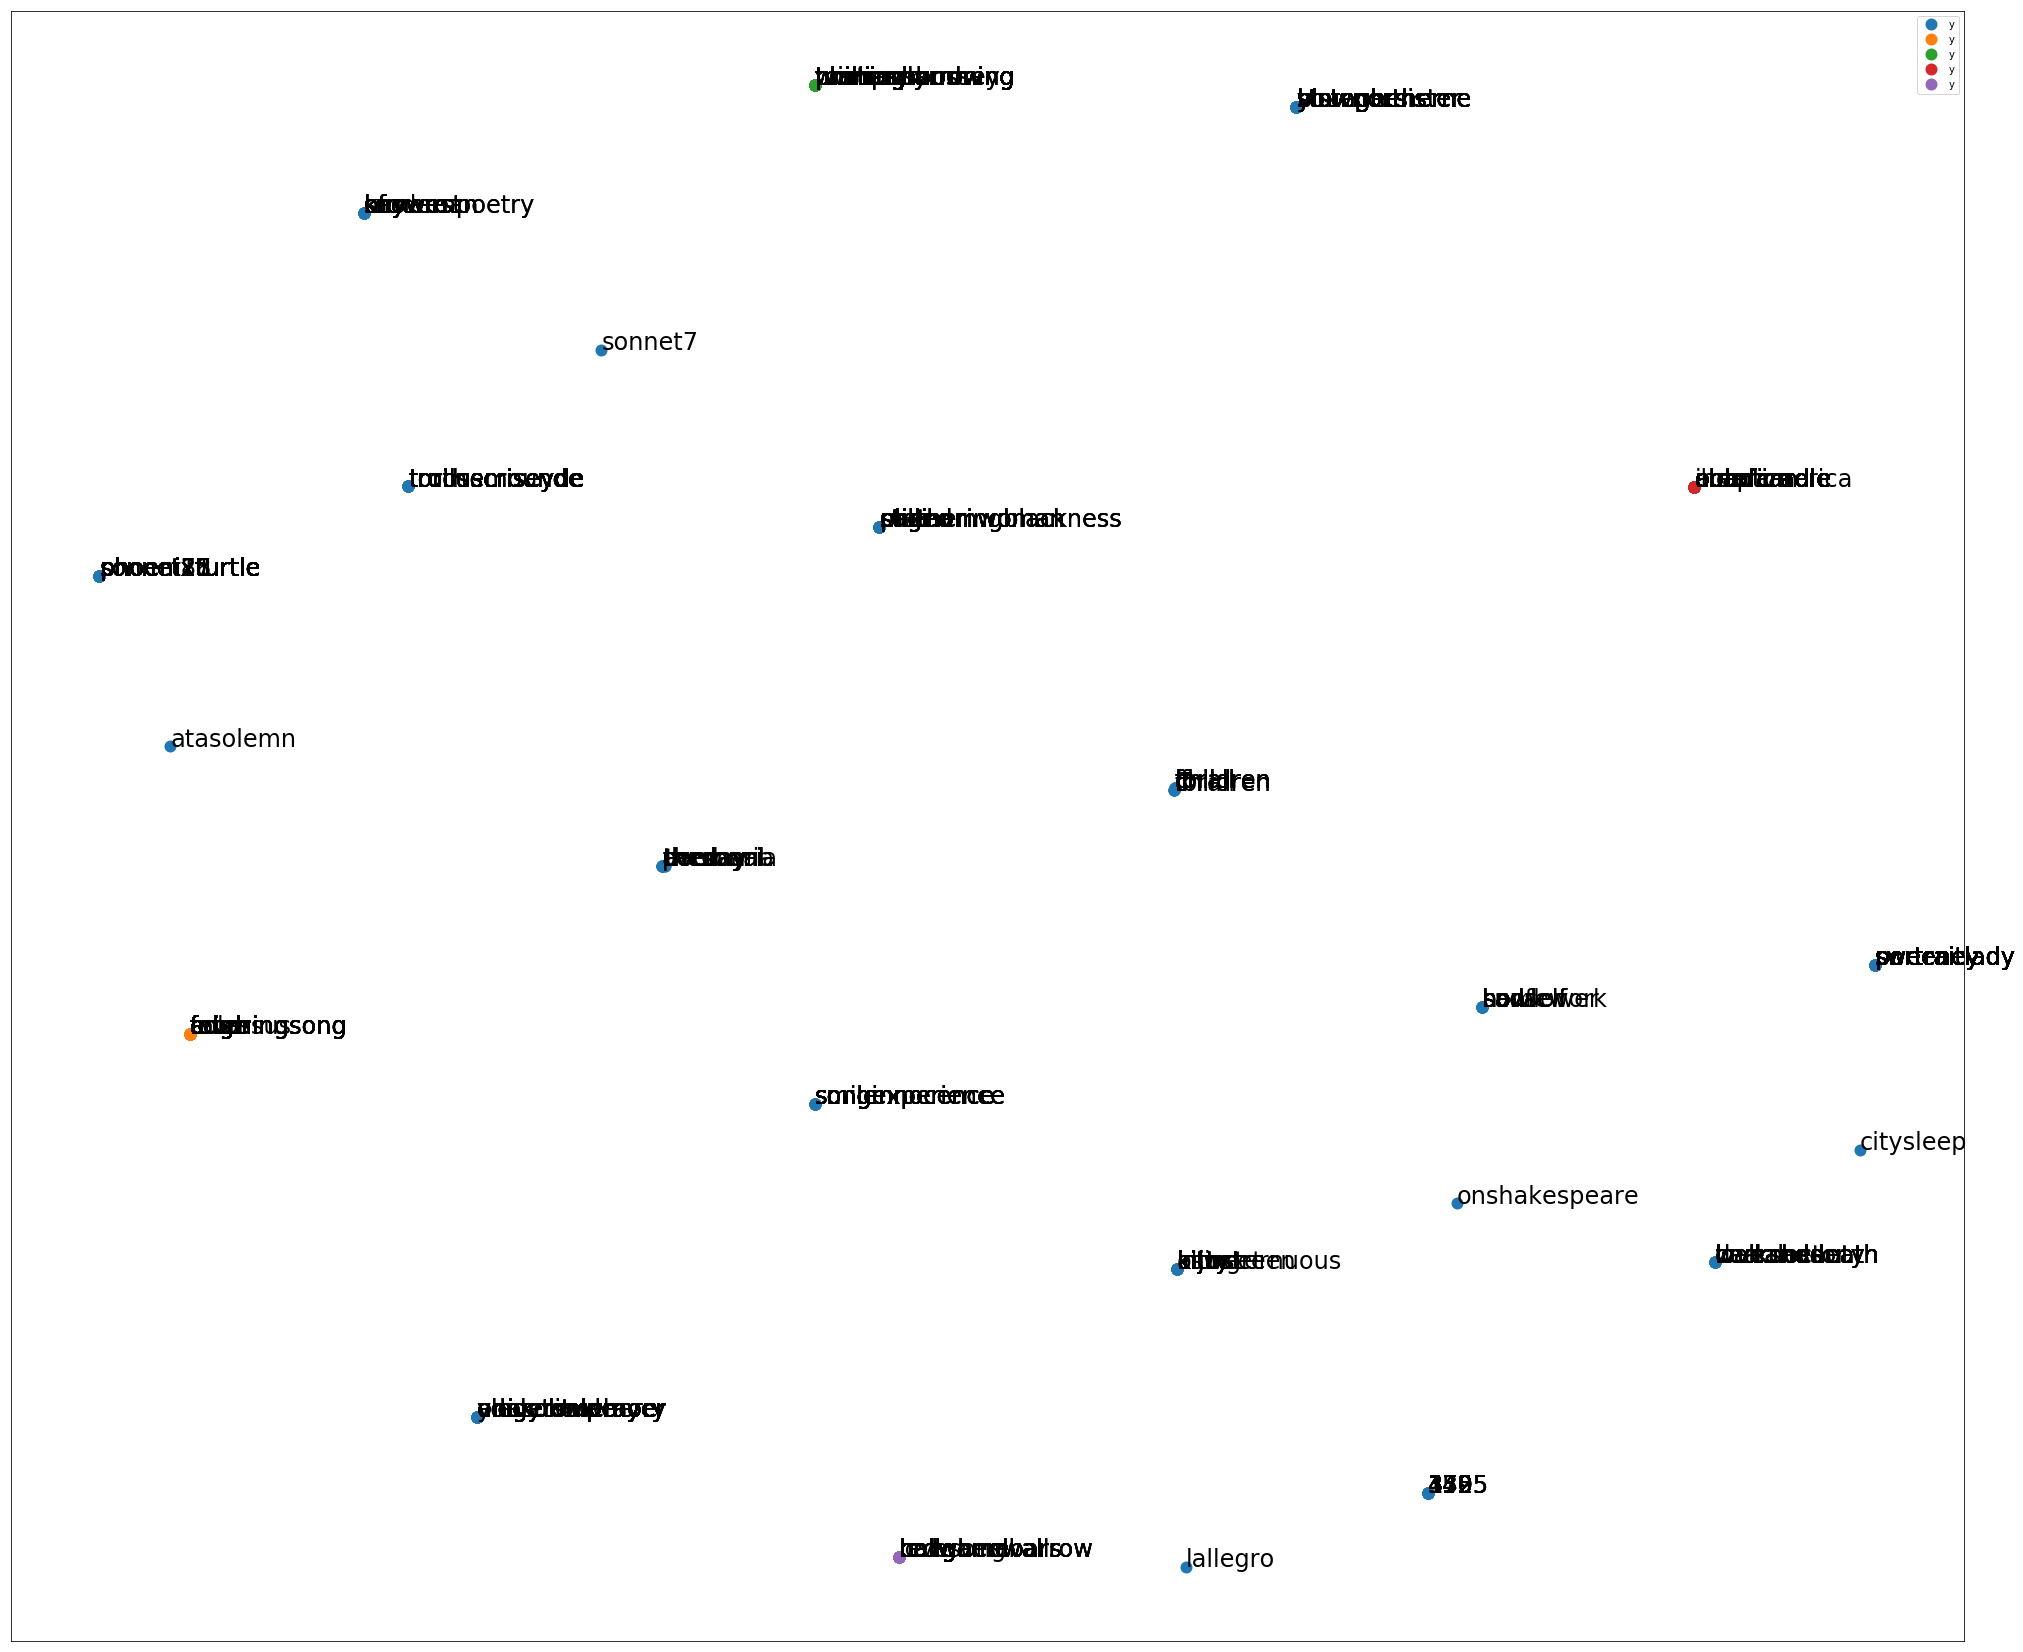

In [75]:
df_clusters = pd.DataFrame(dict(x=xs, y=ys, label=clusters, author=stanza_df.iloc[:,1], 
                       poem=stanza_df.iloc[:,0], period=stanza_df.iloc[:,2])) 
groups = df_clusters.groupby('label')
fig, ax = plt.subplots(figsize=(35, 30)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',      
        bottom='off',      
        top='off',         
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',      
        which='both',      
        left='off',      
        top='off',         
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df_clusters)):
    ax.text(df_clusters.ix[i]['x'], df_clusters.ix[i]['y'], df_clusters.ix[i]['period'], size=24)  

    
    
plt.show() #show the plot

In [42]:
from sklearn.cluster import MiniBatchKMeans

mbk = MiniBatchKMeans(n_clusters=5, batch_size= 300, max_iter=10000, init='k-means++', random_state=24)
X = mbk.fit_transform(tfidf)
mini_clusters = mbk.labels_.tolist()

In [43]:
Counter(mini_clusters)

Counter({4: 266, 2: 20, 0: 83, 1: 68, 3: 25})

In [77]:
df_mini = pd.DataFrame(dict(x=xs, y=ys, label=mini_clusters, author=stanza_df.iloc[:,1], 
                       poem=stanza_df.iloc[:,0], period=stanza_df.iloc[:,2])) 
groups_mini = df_clusters.groupby('label')
fig, ax = plt.subplots(figsize=(35, 30)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups_mini:
    ax.plot(group.x, group.y, marker='D', linestyle='', ms=12, 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',      
        bottom='off',      
        top='off',         
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',      
        which='both',      
        left='off',      
        top='off',         
        labelleft='off')

for i in range(len(df_mini)):
    ax.text(df_mini.iloc[i,0], df_mini.iloc[i,1], df_mini.iloc[i,5], size=24)  

    
    
plt.show() #show the plot

ValueError: arrays must all be same length

In [45]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(tfidf.toarray(), quantile=0.05, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(tfidf.toarray())

labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 1


In [46]:
terms = vectorizer.get_feature_names()
order_centroids_mbk = mbk.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids_mbk[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: white dead let death smile little milk lyke brown world
Cluster 1: thy thou shall beauty theyr heart thee mean singing slow
Cluster 2: love equal law endeard chaird capable ample ungrown adamant daughters
Cluster 3: america im russians dont national millions resources wants havent read
Cluster 4: like rise night bird day far sound al sea shine


In [47]:
order_centroids_km = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids_km[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: ye rise thought like im woman national millions resources say
Cluster 1: night sea day sang singing word break little sound love
Cluster 2: america im equal time russians dont wants old grand mother
Cluster 3: thy thee thou shall beauty let death truth love honour
Cluster 4: love dead white bird know like wyth theyr crowd death


In [368]:
stanza_df.reset_index(inplace=True)

In [48]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

svd= TruncatedSVD(190)
lsa = make_pipeline(svd, Normalizer(copy=False))
lsa_fit = lsa.fit_transform(tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

stanza_by_component=pd.DataFrame(lsa_fit,index=stanza_df.loc[:,'stanza'])
for i in range(10):
    print('Component {}:'.format(i))
    print(stanza_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 72.14750141394764
Component 0:
stanza
america ive given you all and now im nothing. america two dollars and twentyseven cents january 17, 1956. i cant stand my own mind. america when will we end the human war? go fuck yourself with your atom bomb. i dont feel good dont bother me. i wont write my poem till im in my right mind. america when will you be angelic? when will you take off your clothes? when will you look at yourself through the grave? when will you be worthy of your million trotskyites? america why are your libraries full of tears? america when will you send your eggs to india? im sick of your insane demands. when can i go into the supermarket and buy what i need with my good looks? america after all it is you and i who are perfect not the next world. your machinery is too much for me. you made me want to be a saint. there must be some other way to settle this argument. burroughs is in tangiers i dont think hell come back its sinis

Name: 0, dtype: float64
Component 1:
stanza
centre of equal daughters, equal sons, all, all alike endeard, grown, ungrown, young or old, strong, ample, fair, enduring, capable, rich, perennial with the earth, with freedom, law and love, a grand, sane, towering, seated mother, chaird in the adamant of time.    0.974665
centre of equal daughters, equal sons, all, all alike endeard, grown, ungrown, young or old, strong, ample, fair, enduring, capable, rich, perennial with the earth, with freedom, law and love, a grand, sane, towering, seated mother, chaird in the adamant of time.    0.974665
centre of equal daughters, equal sons, all, all alike endeard, grown, ungrown, young or old, strong, ample, fair, enduring, capable, rich, perennial with the earth, with freedom, law and love, a grand, sane, towering, seated mother, chaird in the adamant of time.    0.974665
centre of equal daughters, equal sons, all, all alike endeard, grown, ungrown, young or old, strong, ample, fair, enduring, capa

Name: 2, dtype: float64
Component 3:
stanza
hence loathed melancholy, of cerberus, and blackest midnight born, in stygian cave forlorn, 'mongst horrid shapes, and shrieks, and sights unholy; find out some uncouth cell, where brooding darkness spreads his jealous wings, and the night-raven sings; there under ebon shades, and low-brow'd rocks, as ragged as thy locks, in dark cimmerian desert ever dwell. but come thou goddess fair and free, in heav'n yclep'd euphrosyne, and by men, heart-easing mirth, whom lovely venus at a birth with two sister graces more to ivy-crowned bacchus bore; or whether (as some sager sing) the frolic wind that breathes the spring, zephyr, with aurora playing, as he met her once a-maying, there on beds of violets blue, and fresh-blown roses wash'd in dew, fill'd her with thee, a daughter fair, so buxom, blithe, and debonair. haste thee nymph, and bring with thee jest and youthful jollity, quips and cranks, and wanton wiles, nods, and becks, and wreathed smiles, 

Name: 3, dtype: float64
Component 4:
stanza
america how can i write a holy litany in your silly mood? i will continue like henry ford my strophes are as individual as his automobiles more so theyre all different sexes. america i will sell you strophes $2500 apiece $500 down on your old strophe america free tom mooney america save the spanish loyalists america sacco & vanzetti must not die america i am the scottsboro boys. america when i was seven momma took me to communist cell meetings they sold us garbanzos a handful per ticket a ticket costs a nickel and the speeches were free everybody was angelic and sentimental about the workers it was all so sincere you have no idea what a good thing the party was in 1835 scott nearing was a grand old man a real mensch mother bloor the silk-strikers ewig-weibliche made me cry i once saw the yiddish orator israel amter plain. everybody must have been a spy. america you dont really want to go to war. america its them bad russians. them russians th

Name: 4, dtype: float64
Component 5:
stanza
ywis ye deal uncourteously; what, would ye frumple me? now fy! what, and ye shall be my pigesnye? by christ, ye shall not, no hardely: i will not be japã¨d bodily! gup, christian clout, gup, jack of the vale! with mannerly margery milk and ale.                                                                                                                 0.534365
by god, ye be a pretty pode, and i love you an whole cart-load. straw, james foder, ye play the fode, i am no hackney for your rod: go watch a bull, your back is broad! gup, christian clout, gup, jack of the vale! with mannerly margery milk and ale.                                                                                                            0.534088
madame, ye ben of al beaute shryne as fer as cercled is the mapamounde, for as the cristal glorious ye shyne, and lyke ruby ben your chekes rounde. therwith ye ben so mery and so jocounde that at a revel whan that i see you 

Name: 6, dtype: float64
Component 7:
stanza
white godiva, i unpeel” dead hands, dead stringencies.                                                                    0.572445
each dead child coiled, a white serpent, one at each little                                                               0.537357
the woman is perfected. her dead                                                                                          0.481785
beside the white chickens                                                                                                 0.393520
i never hear that one is dead without the chance of life afresh annihilating me that mightiest belief,                    0.338783
beliefs are bandaged, like the tongue when terror were it told in any tone commensurate would strike us instant dead -    0.299554
devilish leopard! radiation turned it white and killed it in an hour.                                                     0.269206
"kitty". sixteen,5'1",white,prostitute.

In [389]:
type(lsa_fit)

numpy.ndarray